# **Regression Project: Boston House Price Prediction**

# **Marks: 60**


Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

---

## **Objective**

---

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

---

## **Dataset**

---

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars


## **Importing the necessary libraries**


In [1]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings("ignore")

### Loading the dataset


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path ='/content/drive/MyDrive/00.electives/machine_learning/Boston.csv'
path = "Boston.csv"

In [4]:
data = pd.read_csv(path)
# Check the first few rows of the dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview


- Observations
- Sanity checks


In [5]:
data.shape

(506, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
data.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Exploratory Data Analysis (EDA)


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)


### Univariate Analysis


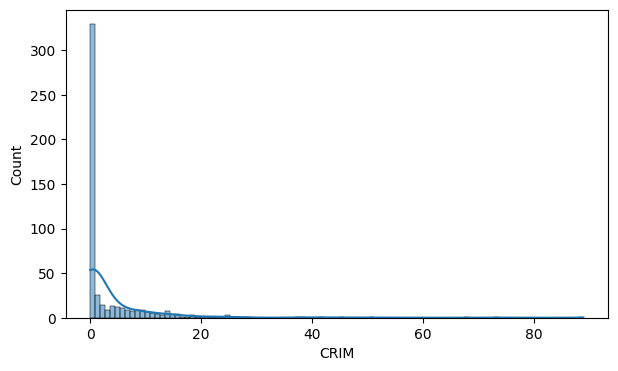

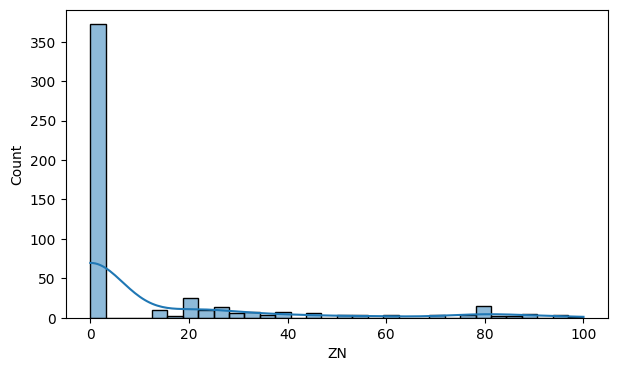

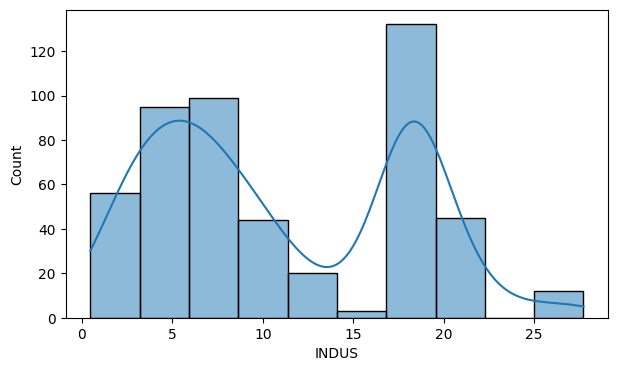

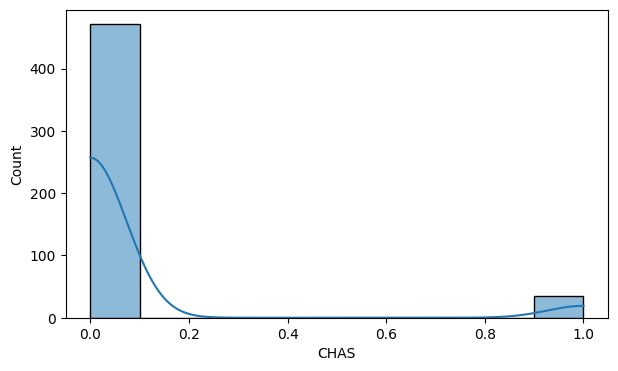

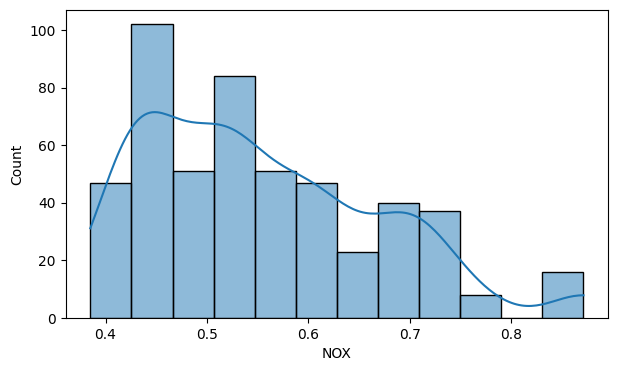

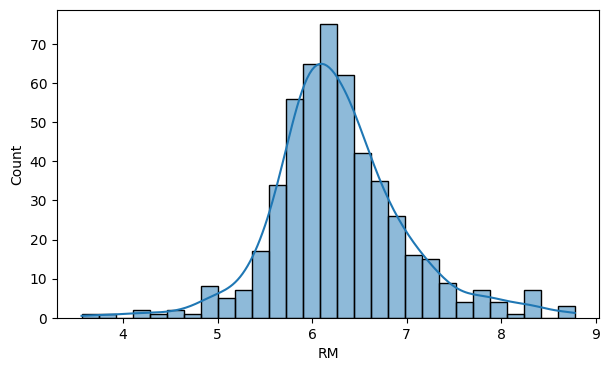

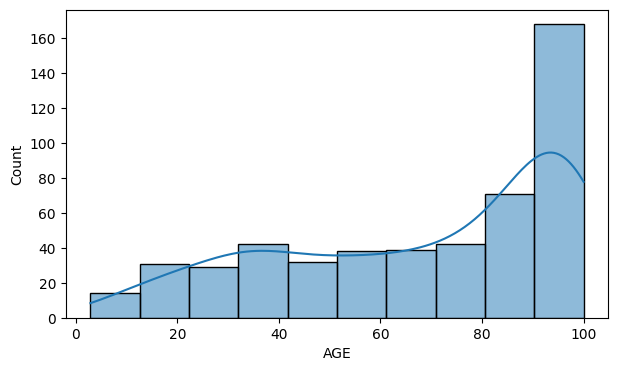

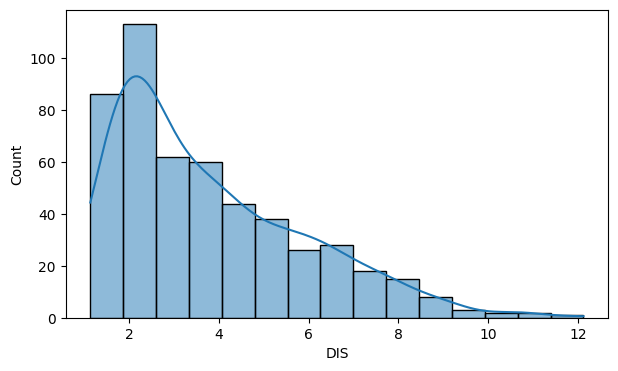

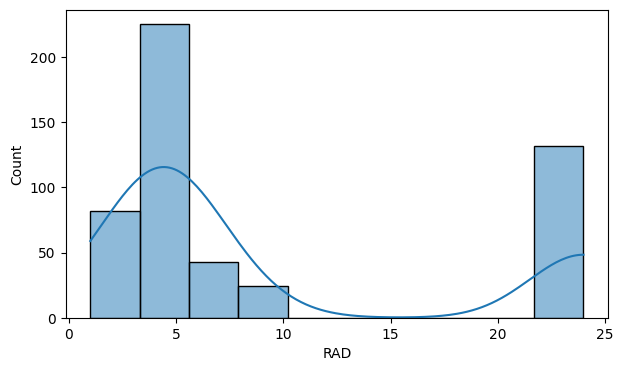

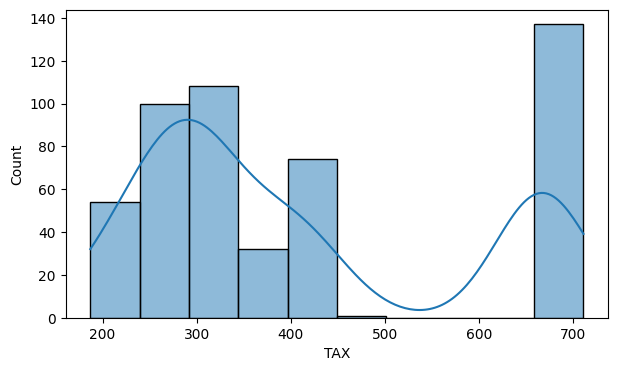

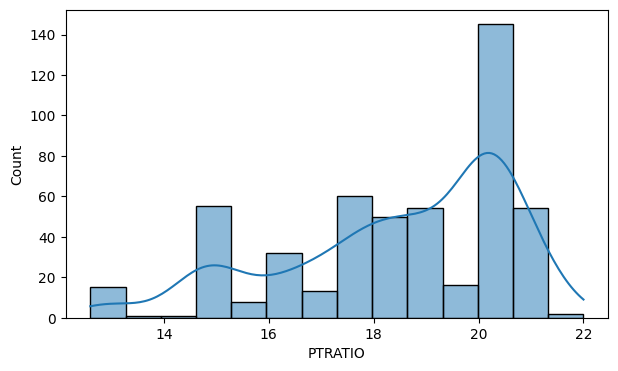

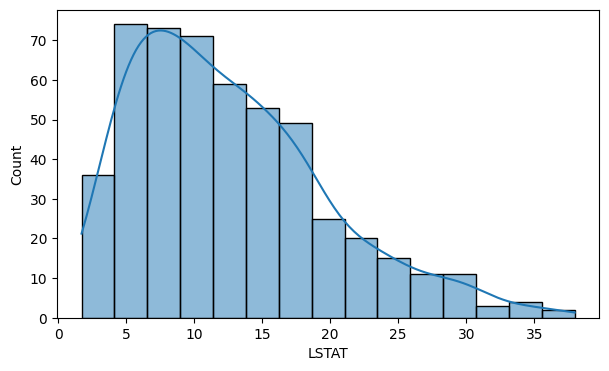

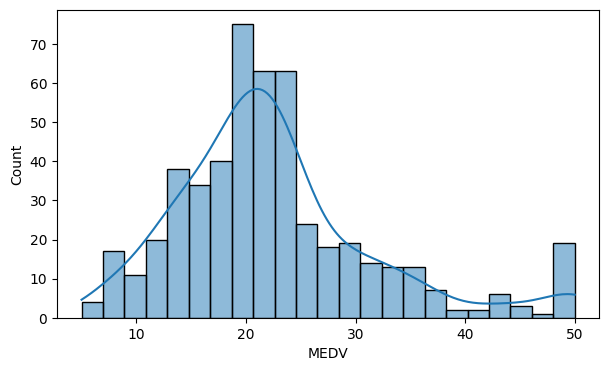

In [8]:
# Plotting all the columns to look at their distributions
for i in data.columns:

    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i, kde=True)
    plt.show()

In [9]:
data["MEDV_log"] = np.log(data["MEDV"])

<Axes: xlabel='MEDV_log', ylabel='Count'>

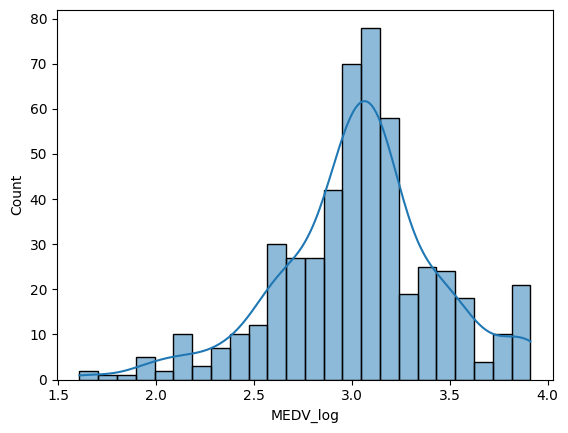

In [10]:
sns.histplot(data=data, x="MEDV_log", kde=True)

### Bivariate analysis


In [11]:
# Calculate correlation matrix including MEDV_log
correlation_matrix = data.corr().round(2)

# If you want to focus on the correlation of features with MEDV_log specifically
correlation_with_medv_log = correlation_matrix[["MEDV_log"]].sort_values(by="MEDV_log", ascending=False)
print(correlation_with_medv_log)

          MEDV_log
MEDV_log      1.00
MEDV          0.95
RM            0.63
ZN            0.36
DIS           0.34
CHAS          0.16
AGE          -0.45
RAD          -0.48
PTRATIO      -0.50
NOX          -0.51
CRIM         -0.53
INDUS        -0.54
TAX          -0.56
LSTAT        -0.81


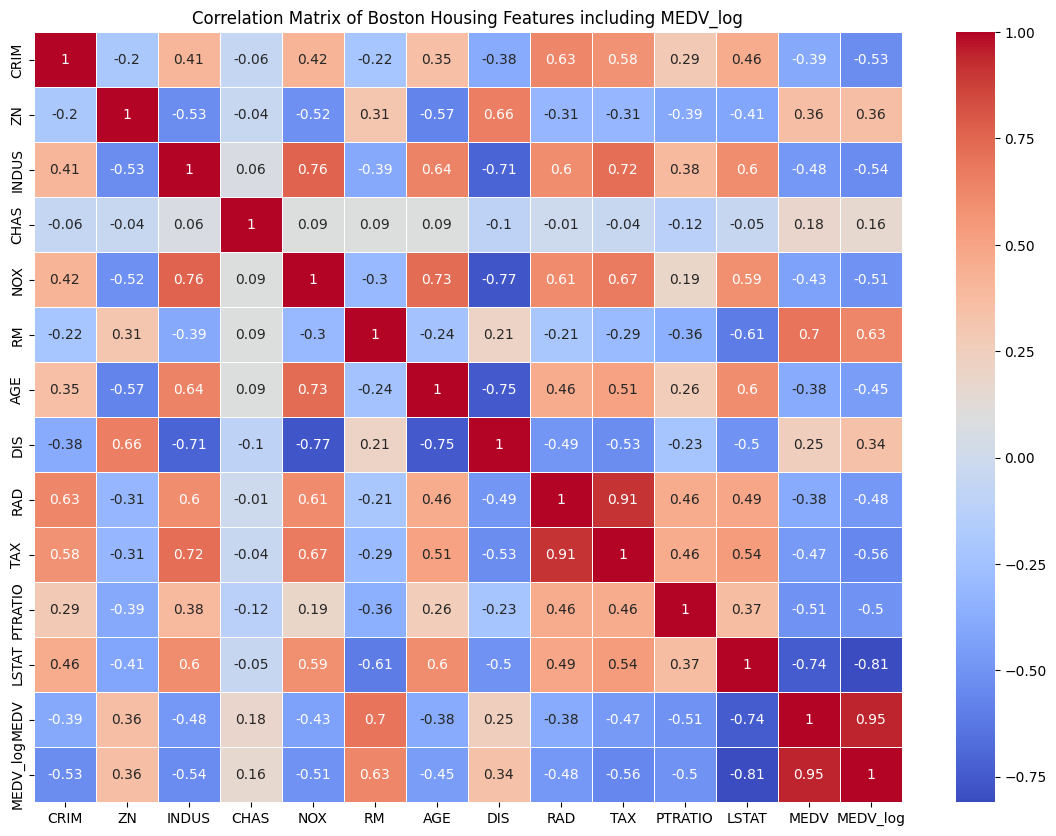

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Boston Housing Features including MEDV_log")
plt.show()

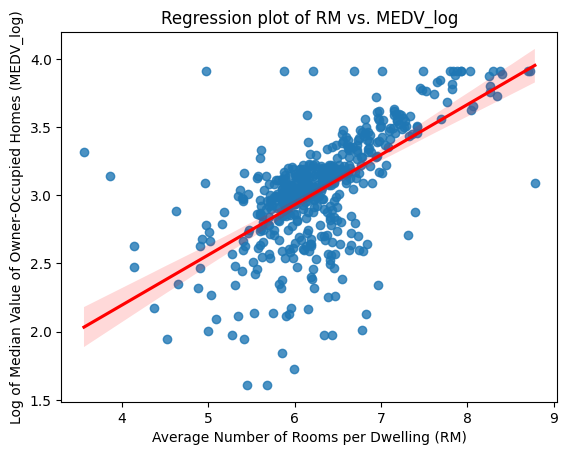

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot for RM vs. MEDV_log
sns.regplot(x="RM", y="MEDV_log", data=data, line_kws={"color": "red"})
plt.title("Regression plot of RM vs. MEDV_log")
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Log of Median Value of Owner-Occupied Homes (MEDV_log)")
plt.show()

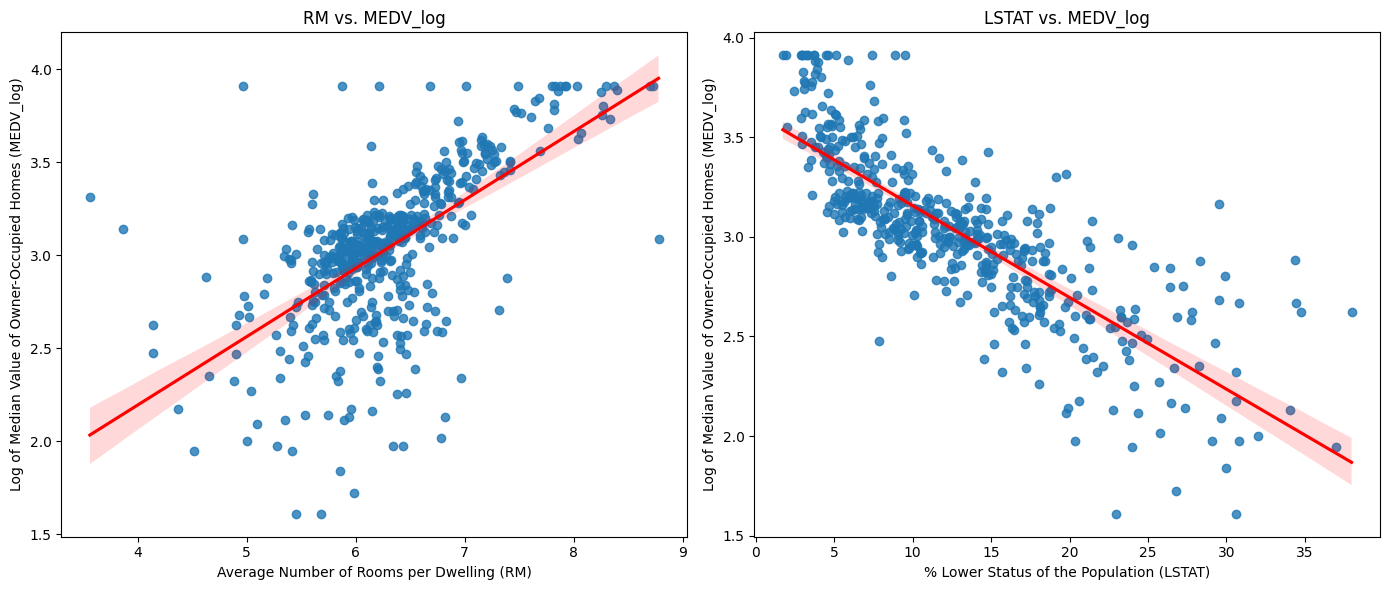

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the visualization layout
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Regression plot for RM vs. MEDV_log
sns.regplot(x="RM", y="MEDV_log", data=data, ax=axs[0], line_kws={"color": "red"})
axs[0].set_title("RM vs. MEDV_log")
axs[0].set_xlabel("Average Number of Rooms per Dwelling (RM)")
axs[0].set_ylabel("Log of Median Value of Owner-Occupied Homes (MEDV_log)")

# Regression plot for LSTAT vs. MEDV_log
sns.regplot(x="LSTAT", y="MEDV_log", data=data, ax=axs[1], line_kws={"color": "red"})
axs[1].set_title("LSTAT vs. MEDV_log")
axs[1].set_xlabel("% Lower Status of the Population (LSTAT)")
axs[1].set_ylabel("Log of Median Value of Owner-Occupied Homes (MEDV_log)")

# Adjusting layout for better fit and displaying the plots
plt.tight_layout()
plt.show()

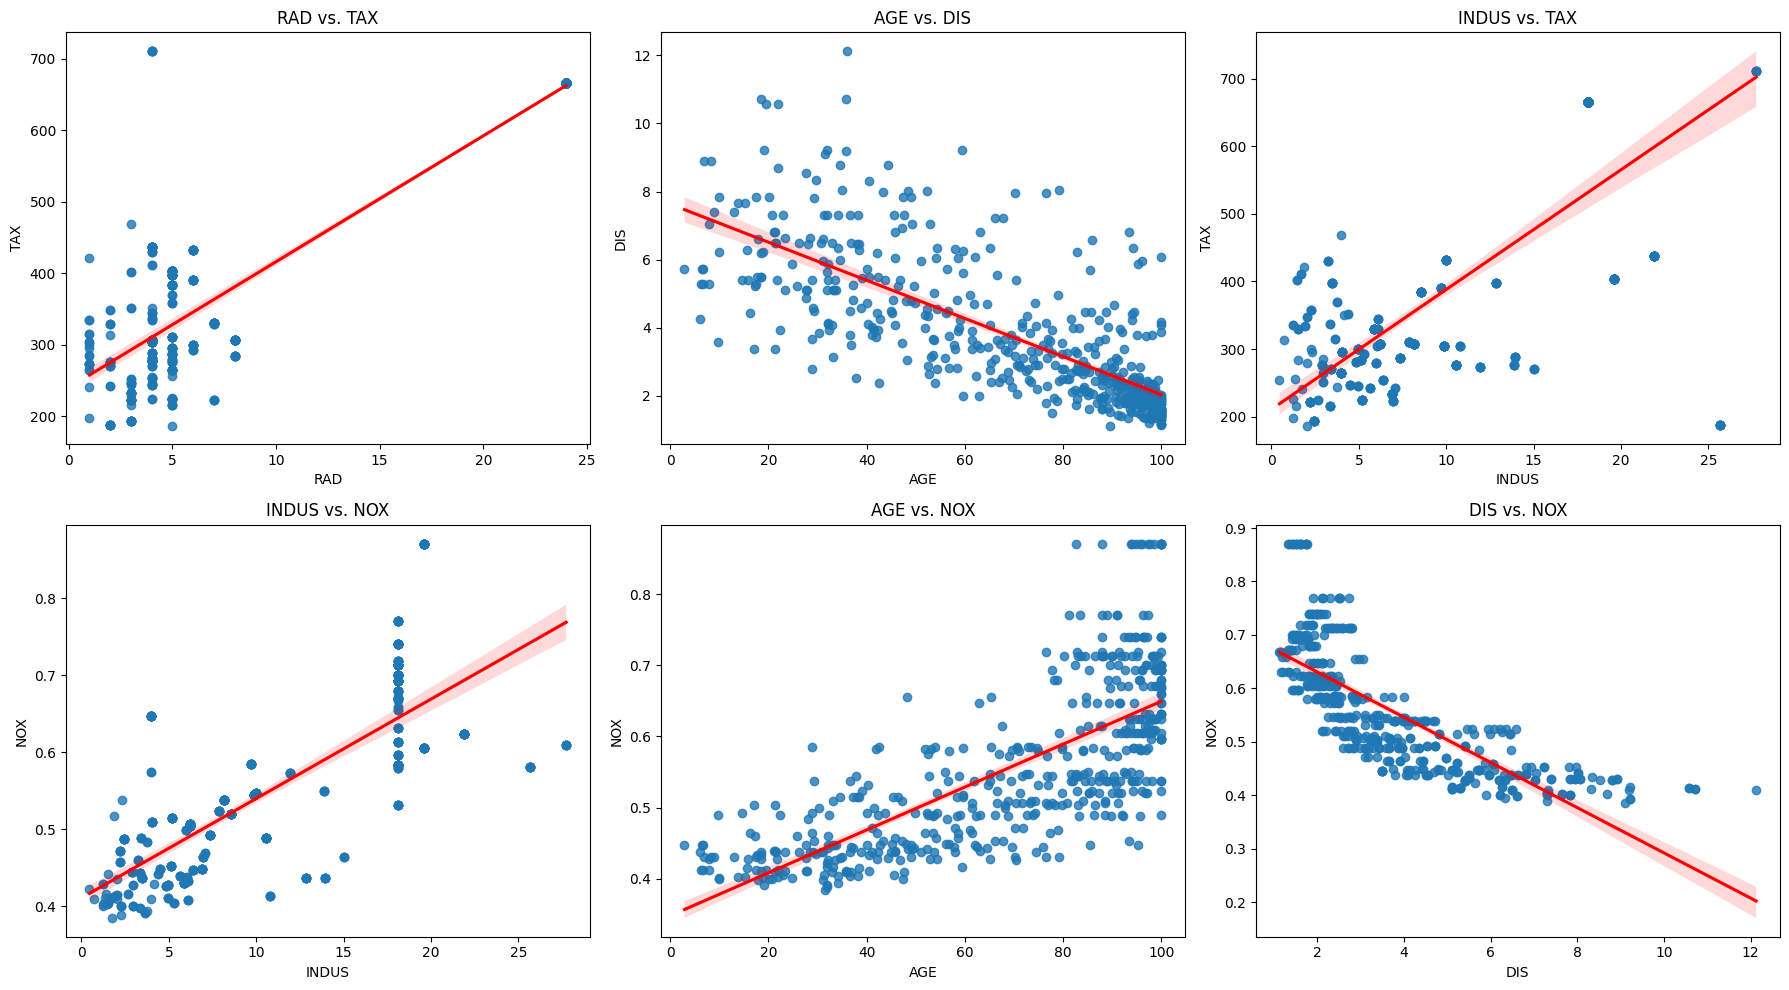

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure size and layout
plt.figure(figsize=(18, 10))

# Regression plot for RAD vs. TAX
plt.subplot(2, 3, 1)
sns.regplot(x="RAD", y="TAX", data=data, line_kws={"color": "red"})
plt.title("RAD vs. TAX")

# Regression plot for AGE vs. DIS
plt.subplot(2, 3, 2)
sns.regplot(x="AGE", y="DIS", data=data, line_kws={"color": "red"})
plt.title("AGE vs. DIS")

# Regression plot for INDUS vs. TAX
plt.subplot(2, 3, 3)
sns.regplot(x="INDUS", y="TAX", data=data, line_kws={"color": "red"})
plt.title("INDUS vs. TAX")

# Regression plot for INDUS vs. NOX
plt.subplot(2, 3, 4)
sns.regplot(x="INDUS", y="NOX", data=data, line_kws={"color": "red"})
plt.title("INDUS vs. NOX")

# Regression plot for AGE vs. NOX
plt.subplot(2, 3, 5)
sns.regplot(x="AGE", y="NOX", data=data, line_kws={"color": "red"})
plt.title("AGE vs. NOX")

# Regression plot for DIS vs. NOX
plt.subplot(2, 3, 6)
sns.regplot(x="DIS", y="NOX", data=data, line_kws={"color": "red"})
plt.title("DIS vs. NOX")

# Adjusting layout for better fit and displaying the plots
plt.tight_layout()
plt.show()

In [16]:
# Remove the data corresponding to high tax rate
from scipy.stats import pearsonr

df1 = data[data["TAX"] < 600]

# Import the required function

# Calculate the correlation
print("The correlation between TAX and RAD is", pearsonr(df1["TAX"], df1["RAD"])[0])

The correlation between TAX and RAD is 0.24975731331429196


## Observation and Insights

### RAD vs. TAX:

- There appears to be a strong positive linear relationship between the accessibility to radial highways (`RAD`) and the full-value property-tax rate (`TAX`).
- A potential outlier cluster can be observed where the `TAX` rate is the highest across all values of `RAD`.
- The correlation coefficient provided is approximately 0.25, indicating a moderate positive relationship. However, the plot suggests the relationship might be stronger within different subsets of the data, as indicated by the distinct group with a very high `TAX` rate.

### AGE vs. DIS:

- There's a noticeable negative linear relationship between the proportion of owner-occupied units built before 1940 (`AGE`) and the weighted distances to five Boston employment centers (`DIS`).
- This suggests that older regions are closer to employment centers, which might be due to the historical development patterns of cities where older buildings are often closer to commercial centers.

### INDUS vs. TAX:

- The relationship between the proportion of non-retail business acres per town (`INDUS`) and `TAX` seems to be strongly positive, indicating that more industrially developed areas have higher tax rates.
- It is worth noting that the relationship may be driven by certain zoning laws or economic policies that tax industrial areas at a higher rate.

### INDUS vs. NOX:

- There's a strong positive relationship between `INDUS` and nitric oxide concentration (`NOX`), which suggests that industrial areas have higher pollution levels, as NOX is a common pollutant emitted from industrial activities.

### AGE vs. NOX:

- A positive relationship is observed here as well, indicating that older areas tend to have higher levels of NOX.
- This might reflect the fact that older areas were developed during times when environmental regulations were less stringent or that they are located closer to industrial zones which emit NOX.

### DIS vs. NOX:

- A strong negative relationship is present, suggesting that areas farther from employment centers have lower NOX concentrations.
- This aligns with the understanding that commercial and industrial zones, which are typically closer to city centers, are larger contributors to NOX emissions.

### RM vs. MEDV_log:

- There's a clear positive linear relationship between the average number of rooms per dwelling (`RM`) and the log-transformed median value of homes (`MEDV_log`), indicating that larger homes (with more rooms) generally command higher prices.
- The distribution of points suggests that the variability in price increases with the number of rooms, as seen by the widening confidence interval around the regression line for higher `RM` values.

### LSTAT vs. MEDV_log:

- There is a strong negative linear relationship between `LSTAT` and `MEDV_log`. Higher values of `LSTAT` (indicating more lower-status population) correspond to lower values of `MEDV_log` (lower house prices).
- The relationship seems quite robust across the range of `LSTAT`, but some outliers or deviations from the trend can be observed at both ends of the `LSTAT` spectrum.

### General Insights:

- **Economic Factors**: Areas with better highway access and industrial zones are associated with higher taxes, which could have various socio-economic implications.
- **Environmental Impact**: Industrial development is correlated with higher levels of pollution (NOX), which has health and environmental implications.
- **Urban Development**: Older houses being closer to employment centers reflects urban development patterns, and this has a correlation with both increased taxes and pollution.
- **Housing Market Dynamics**: The number of rooms is a significant predictor of housing prices, while socio-economic status (as inferred from `LSTAT`) also plays a crucial role in determining housing affordability.


## Data Preprocessing


- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)


In [17]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [18]:
# Check the skewness of the original and log-transformed variable
print(f"Skewness of MEDV: {data['MEDV'].skew()}")
print(f"Skewness of MEDV_log: {data['MEDV_log'].skew()}")

Skewness of MEDV: 1.1080984082549072
Skewness of MEDV_log: -0.33032129530987864


In [19]:
from scipy import stats

# Example for the 'RM' feature
Q1 = data["RM"].quantile(0.25)
Q3 = data["RM"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data["RM"] >= lower_bound) & (data["RM"] <= upper_bound)]

In [20]:
# Assuming 'CHAS' is a categorical feature in your dataset
data_to_train = pd.get_dummies(data, columns=["CHAS"], drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split

X = data_to_train.drop(["MEDV", "MEDV_log"], axis=1)  # Drop the original and log-transformed MEDV
y = data_to_train["MEDV_log"]  # Use the log-transformed MEDV as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building - Linear Regression


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


# Method to calculate VIF for each feature
def check_vif(dataframe):
    # Adding a constant column for the intercept in VIF calculation
    df_vif = add_constant(dataframe)

    # Calculating VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

    return vif_data

In [24]:
# Convert boolean columns to integers if there are any
X = X.applymap(lambda x: 1 if x == True else (0 if x == False else x))

# Check the data types and change if necessary
X = X.apply(pd.to_numeric, errors="coerce")

# Check for missing values
if X.isnull().values.any():
    print("Missing values found. Handle them before proceeding.")
    # Handle missing values by imputation or by dropping rows/columns

# Check for infinite values and handle them
if np.isinf(X.values).any():
    print("Infinite values found. Handle them before proceeding.")
    # Handle infinite values by imputation or by capping

# Now you can safely calculate VIF
vif_data = check_vif(X)
print(vif_data)

    feature         VIF
0     const  660.639451
1      CRIM    1.685462
2        ZN    2.388030
3     INDUS    3.907966
4       NOX    4.358799
5        RM    1.852260
6       AGE    3.071097
7       DIS    4.088994
8       RAD    7.317435
9       TAX    8.593720
10  PTRATIO    1.681209
11    LSTAT    2.809196
12   CHAS_1    1.063189


In [25]:
# Drop the 'TAX' column from the features dataset
X = X.drop(["TAX"], axis=1)

# Recalculate VIF for the remaining features
vif_data_after_dropping_tax = check_vif(X)

# Display the new VIF results
print(vif_data_after_dropping_tax)

    feature         VIF
0     const  652.197524
1      CRIM    1.685249
2        ZN    2.247027
3     INDUS    3.232649
4       NOX    4.338273
5        RM    1.843564
6       AGE    3.068212
7       DIS    4.088782
8       RAD    2.732759
9   PTRATIO    1.673771
10    LSTAT    2.809025
11   CHAS_1    1.042835


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
import statsmodels.api as sm

# Unlike scikit-learn, statsmodels doesn't automatically include an intercept in its models, so you need to add one manually.
X_train_with_intercept = sm.add_constant(X_train)

# Create the model
model = sm.OLS(y_train, X_train_with_intercept)

# Fit the model
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     94.83
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           7.42e-94
Time:                        07:28:24   Log-Likelihood:                 82.980
No. Observations:                 333   AIC:                            -142.0
Df Residuals:                     321   BIC:                            -96.26
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0617      0.269     15.106      0.0

In [28]:
# Add a constant to the test set
X_test_with_intercept = sm.add_constant(X_test)

# Making predictions
y_pred = results.predict(X_test_with_intercept)

## Model Performance Check


1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.12498440045225252
Mean Squared Error (MSE): 0.029623130250583135
Root Mean Squared Error (RMSE): 0.172113713139259
R-squared (R²): 0.7492680029491912


### OLS Regression Results Analysis

- **R-squared**: The model explains 76.5% of the variance in the log-transformed median value of owner-occupied homes (`MEDV_log`), which is quite good. The **Adjusted R-squared** is slightly lower at 75.7%, which adjusts for the number of predictors in the model, still indicating a strong fit.
- **Coefficients**: The coefficients indicate the expected change in the log of `MEDV` for a one-unit change in the predictor variable, holding other variables constant. For example, `RM` (the average number of rooms per dwelling) has a positive coefficient of 0.0751, suggesting that an increase in the number of rooms is associated with an increase in the value of the property. Conversely, `NOX` (nitric oxide concentration) has a significant negative impact on `MEDV_log`, with a coefficient of -0.6112.
- **P-values**: Variables like `CRIM`, `NOX`, `RM`, `DIS`, `PTRATIO`, `LSTAT`, and `CHAS_1` show significant p-values (p < 0.05), indicating that these predictors are statistically significant. In contrast, variables such as `ZN`, `INDUS`, and `AGE` have higher p-values, suggesting they might not contribute significantly to the model.
- **Confidence Intervals**: The 95% confidence intervals for the coefficients indicate the precision of these estimates. A narrow interval suggests a more precise estimate of the coefficient.

### Performance Metrics

- **MAE (Mean Absolute Error)**: At approximately 0.125, the average absolute error of the predictions is quite low, indicating good model performance.
- **MSE (Mean Squared Error)**: The MSE is around 0.0296, which is relatively small, suggesting that the model's predictions are close to the actual values.
- **RMSE (Root Mean Squared Error)**: The RMSE is 0.172, which, similar to the MAE and MSE, indicates a close fit to the actual data. Being in the same units as the dependent variable, it's particularly interpretable.
- **R-squared for Prediction**: The R² value on the test set is 0.749, slightly lower than the R-squared from the training set but still indicates a strong predictive power.

### Insights and Next Steps

- The model performs well in predicting the log-transformed median house values based on the given features. It's effective in capturing the relationship between house prices and the predictors.
- The significant predictors identified (based on p-values and their coefficients) should be the focus of any interpretation or policy recommendations.
- The differences in R-squared between training and test sets are minimal, suggesting that the model generalizes well to unseen data.
- For the less significant variables (`ZN`, `INDUS`, `AGE`), consider whether they are necessary for your model or if removing them might simplify the model without sacrificing predictive power.
- Given the performance metrics, further improvements might involve exploring non-linear relationships, interaction effects, or experimenting with different subsets of predictors.


## Checking Linear Regression Assumptions


- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.


## Checking Linearity


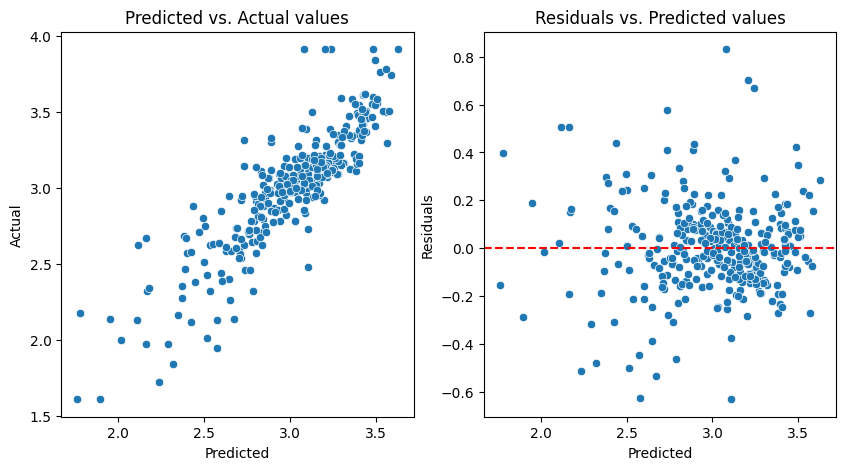

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values
y_pred_train = results.predict(X_train_with_intercept)

# Residuals
residuals = y_train - y_pred_train

# Plotting the predicted values vs. actual values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_train, y=y_train)
plt.title("Predicted vs. Actual values")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_train, y=residuals)
plt.title("Residuals vs. Predicted values")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

## Checking Normality of Residuals


<Figure size 1000x500 with 0 Axes>

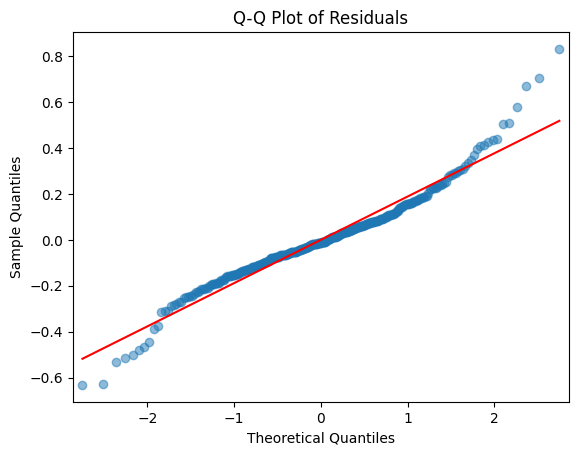

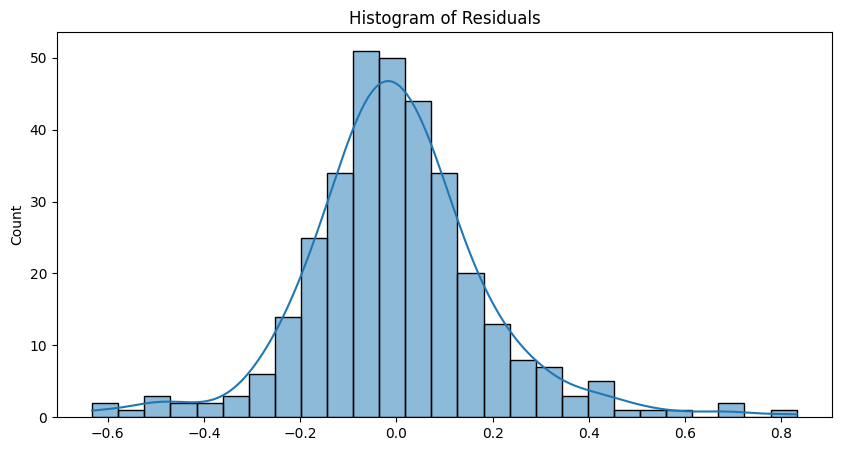

In [31]:
# Q-Q plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line="s", alpha=0.5)
plt.title("Q-Q Plot of Residuals")

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

### Predicted vs. Actual Values:

The scatter plot of the predicted versus actual values shows a positive linear relationship, which is a good sign. However, there seems to be some deviation from the line of perfect fit, especially for higher values. This could mean that the model might not capture all the nuances for higher-valued homes.

### Residuals vs. Predicted Values:

The residuals do not display any clear pattern, which suggests good model fit in terms of linearity and homoscedasticity. However, there might be some signs of heteroscedasticity, as the spread of residuals seems to possibly increase with the predicted value. This can be an indication that variance is not constant across all levels of the independent variables, a violation of the homoscedasticity assumption.

### Q-Q Plot of Residuals:

The Q-Q plot shows that the residuals deviate from the red line in the tails, especially on the upper end. This indicates that the residuals might not be completely normally distributed and that there may be some outliers or extreme values influencing the distribution.

### Histogram of Residuals:

The histogram of residuals looks approximately normally distributed, but with a slight right skew. The skewness is also visible in the Q-Q plot. This might indicate that some non-linear transformations or outlier treatment could improve the normality of the residuals.

### Potential Improvements:

1. **Non-linearity**: Explore non-linear transformations of the predictors, such as polynomial terms or interactions, especially if there's theoretical justification or domain knowledge that suggests certain variables might have a non-linear effect on the outcome.

2. **Heteroscedasticity**: If heteroscedasticity is present, consider using heteroscedasticity-consistent standard errors, or transforming the dependent variable (you already applied log-transformation, so you could also consider Box-Cox or other transformations).

3. **Outliers**: Investigate any potential outliers or influential points that could be unduly affecting the model. These might be visible in plots of leverage or influence such as Cook's distance.

4. **Feature Selection**: Review the feature selection, considering removing non-significant variables to simplify the model, which sometimes improves model performance by reducing variance without increasing bias too much.

5. **Add Missing Variables**: There could be important variables not included in the model that could improve its explanatory power.

6. **Advanced Techniques**: Consider other forms of regression that are robust to violations of OLS assumptions, such as quantile regression or robust regression.

7. **Model Validation**: Perform cross-validation to ensure that the model performance is consistent across different subsets of the data.


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
lin_reg = LinearRegression()

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation
# Note: Negative sign before scoring functions because cross_val_score interprets 'greater is better' for its score
scores_mae = cross_val_score(lin_reg, X_train_with_intercept, y_train, scoring="neg_mean_absolute_error", cv=k)
scores_mse = cross_val_score(lin_reg, X_train_with_intercept, y_train, scoring="neg_mean_squared_error", cv=k)
scores_r2 = cross_val_score(lin_reg, X_train_with_intercept, y_train, scoring="r2", cv=k)

# Convert the scores to positive for MAE and MSE
scores_mae = -scores_mae
scores_mse = -scores_mse

# Calculate the mean and standard deviation of the scores for each metric
mae_mean, mae_std = scores_mae.mean(), scores_mae.std()
mse_mean, mse_std = scores_mse.mean(), scores_mse.std()
r2_mean, r2_std = scores_r2.mean(), scores_r2.std()

# Print the results
print(f"Mean Absolute Error (MAE) - Mean: {mae_mean:.3f}, Standard Deviation: {mae_std:.3f}")
print(f"Mean Squared Error (MSE) - Mean: {mse_mean:.3f}, Standard Deviation: {mse_std:.3f}")
print(f"R-squared (R²) - Mean: {r2_mean:.3f}, Standard Deviation: {r2_std:.3f}")

Mean Absolute Error (MAE) - Mean: 0.149, Standard Deviation: 0.009
Mean Squared Error (MSE) - Mean: 0.047, Standard Deviation: 0.011
R-squared (R²) - Mean: 0.670, Standard Deviation: 0.078


- **Mean Absolute Error (MAE)**: The mean MAE is 0.149 with a standard deviation of 0.009. This tells us that, on average, the model's predictions are approximately 0.149 units away from the actual values. The low standard deviation suggests that the model has relatively consistent performance across different folds in terms of MAE.
- **Mean Squared Error (MSE)**: The mean MSE is 0.047 with a standard deviation of 0.011. This is a measure of the average squared difference between the actual and predicted values and gives more weight to larger errors. The higher standard deviation compared to MAE indicates there's more variation in the model's performance when it comes to MSE across different folds.

- **R-squared (R²)**: The mean R² is 0.670 with a standard deviation of 0.078. R² tells us how well the independent variables explain the variability in the target variable, so an R² of 0.670 means the model explains 67% of the variability. The standard deviation of R² indicates that there's some fluctuation in how well the model fits the different folds of the cross-validation, but generally, it's providing a moderate fit.

### Interpreting the Results

The cross-validation results are somewhat lower than the results you obtained on the training set, where the R-squared was around 0.765. This drop in performance indicates that the model may be overfitting to the training data or that there's variability in the dataset that the model is not capturing consistently.

### Steps to Improve the Model

Given the cross-validation results, here are some steps that might improve the model:

1. **Feature Engineering**: Revisit your features and see if you can add new features or transform existing ones to capture more of the data's complexity.

2. **Hyperparameter Tuning**: For more complex models than OLS, tune the model hyperparameters using methods such as Grid Search or Random Search.

3. **Regularization**: If overfitting is a concern, consider using a regularization technique like Ridge or Lasso regression that can penalize large coefficients.

4. **Model Complexity**: Evaluate if a more complex or a more simplified model is needed. Sometimes, reducing complexity can lead to better generalization, or alternatively, a more complex model might capture additional nuances in the data.

5. **Outlier Detection**: Review the data for outliers or influential points that may unduly affect the model.

6. **Cross-Validation Strategy**: Evaluate if a different cross-validation strategy is more suitable. For instance, if the data has a temporal component, time-series cross-validation would be more appropriate.

7. **Data Quality**: Ensure that the data is clean, relevant features are included, and any data issues are resolved.


In [33]:
import pandas as pd

# Assuming 'results' is the fitted OLS model from statsmodels
# Extract the coefficients
coefs = results.params

# Create a DataFrame with the features and corresponding coefficients
coefs_df = pd.DataFrame({"Feature": coefs.index, "Coefs": coefs.values})

# If you have a constant in the model, you might want to rename it from 'const' to 'Intercept'
coefs_df["Feature"] = coefs_df["Feature"].replace({"const": "Intercept"})

coefs_df

,Feature,Coefs
0,Intercept,4.061730
1,CRIM,-0.013543
2,ZN,0.000597
3,INDUS,-0.001502
4,NOX,-0.611220
5,RM,0.075144
6,AGE,0.000508
7,DIS,-0.038517
8,RAD,0.003961
9,PTRATIO,-0.034790


These coefficients represent the estimated change in the log-transformed median value of owner-occupied homes (`MEDV_log`) for a one-unit change in each feature, holding all other features constant.

Here's a breakdown of what each coefficient indicates in the context of the model:

- **Intercept (4.061730)**: The expected value of `MEDV_log` when all other features are zero.
- **CRIM (-0.013543)**: A one-unit increase in per capita crime rate by town is associated with a decrease of 0.0135 in `MEDV_log`.
- **ZN (0.000597)**: The proportion of residential land zoned for lots over 25,000 sq.ft. has a very small positive association with `MEDV_log`.
- **INDUS (-0.001502)**: A one-unit increase in the proportion of non-retail business acres per town is associated with a slight decrease in `MEDV_log`.
- **NOX (-0.611220)**: An increase in nitric oxides concentration (parts per 10 million) has a substantial negative impact on `MEDV_log`.
- **RM (0.075144)**: The number of rooms per dwelling is positively associated with `MEDV_log`, with each additional room increasing `MEDV_log` by about 0.0751.
- **AGE (0.000508)**: The proportion of owner-occupied units built before 1940 has a very small positive effect on `MEDV_log`.
- **DIS (-0.038517)**: An increase in the weighted distances to five Boston employment centers is associated with a decrease in `MEDV_log`.
- **RAD (0.003961)**: The index of accessibility to radial highways has a small positive association with `MEDV_log`.
- **PTRATIO (-0.034790)**: A higher pupil-teacher ratio by town is associated with a lower `MEDV_log`.
- **LSTAT (-0.032381)**: A higher percentage of lower status of the population is strongly associated with a decrease in `MEDV_log`.
- **CHAS_1 (0.145185)**: Being close to the Charles River (`CHAS` dummy variable) is associated with an increase in `MEDV_log`.

Coefficients with larger absolute values indicate a stronger effect on the dependent variable, whereas those closer to zero have a lesser effect. The signs (+/-) of these coefficients indicate the direction of the association.


## Actionable Insights and Recommendations


### Conclusions:

1. **Location and Environmental Quality**:

   - **Crime Rate (CRIM)**: The negative coefficient for CRIM suggests that higher crime rates are associated with lower housing values. This is an expected finding and indicates the importance of safety and security in real estate valuation.
   - **Nitric Oxides Concentration (NOX)**: The substantial negative impact of NOX on housing values suggests that environmental quality, specifically air quality, is a significant determinant of property values.

2. **Housing Features**:

   - **Rooms per Dwelling (RM)**: As the number of rooms increases, so does the value of the property. This highlights the importance of size and space in residential real estate.
   - **Age of Property (AGE)**: The positive coefficient, albeit small, suggests that there might be a premium on certain older properties, perhaps due to architectural style or construction quality.

3. **Accessibility and Convenience**:

   - **Distance to Employment Centers (DIS)**: The negative coefficient for DIS implies that houses closer to employment centers tend to be more valuable, underscoring the value placed on reduced commuting times.
   - **Access to Highways (RAD)**: Easy access to radial highways has a positive influence, albeit a small one, on housing prices, which could be due to the convenience factor for homeowners.

4. **Educational and Demographic Factors**:

   - **Pupil-Teacher Ratio (PTRATIO)**: The negative coefficient suggests that areas with lower pupil-teacher ratios, which can imply better schooling opportunities, are valued higher in the housing market.
   - **Socioeconomic Status (LSTAT)**: A higher percentage of "lower status" population in the area has a significant negative effect on housing values, indicating the impact of demographic factors on real estate prices.

5. **Proximity to the Charles River (CHAS)**:
   - Being near the Charles River is a significant positive factor, likely due to the aesthetic and recreational value associated with riverfront locations.

### Business Recommendations:

1. **Real Estate Development and Investment**:

   - Focus on areas with low crime rates and better air quality to ensure higher property values.
   - Consider environmental improvements in or around properties as a means to increase their market value.

2. **Home Buyers and Sellers**:

   - Emphasize the number of rooms and living space during transactions, as these features are clearly valued in the market.
   - Highlight the benefits of local educational resources and their influence on property values.

3. **Urban Planning and Policy**:

   - Implement policies to improve air quality and reduce pollution, which could have a ripple effect on increasing property values.
   - Invest in educational infrastructure to improve pupil-teacher ratios, as this could enhance the attractiveness of a community for families.

4. **Marketing Strategies**:

   - Real estate agents should highlight properties’ proximity to employment centers and accessibility to highways when marketing homes.
   - Leverage the proximity to natural resources, like the Charles River, as a key selling point for properties in such locales.

5. **Data-Driven Decision Making**:
   - Use regression analysis as a tool for appraising property values, aiding in investment decisions, and assessing the potential impact of various features and improvements on property prices.


---
